In [1]:
# let's test it with different models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
import datetime as dt

In [4]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Predicting future temperature 

In [6]:
des = pd.read_csv('columns_description.csv')
des

,column_index,columns_pt-br,columns_en,abbreviation,description
0,0,data,date,date,date (YYYY-MM-DD)
1,1,hora,hour,hr,hour (HH:00)
2,2,"precipitacao total,horario (mm)",total precipitation (mm),prcp,Amount of precipitation in millimetres (last h...
3,3,pressao atmosferica ao nivel da estacao (mb),atmospheric pressure at station height (mb),stp,Atmospheric pressure at station level (mb)
4,4,pressao atmosferica max. na hora ant. (aut) (mb),atmospheric pressure max. in the previous hour...,smax,Maximum air pressure for the last hour in hPa ...
5,5,pressao atmosferica min. na hora ant. (aut) (mb),atmospheric pressure min. in the previous hour...,smin,Minimum air pressure for the last hour in hPa ...
6,6,radiation (kj/m2),radiation (kj/m2),gbrd,Solar radiation KJ/m2
7,7,temperatura do ar - bulbo seco (°c),air temperature - dry bulb (°c),temp,Air temperature (instant) in celsius degrees
8,8,temperatura do ponto de orvalho (°c),dew point temperature (°c),dewp,Dew point temperature (instant) in celsius deg...
9,9,temperatura maxima na hora ant. (aut) (°c),max. temperature in the previous hour (°c),tmax,Maximum temperature for the last hour in celsi...


In [7]:
df = pd.read_csv('southeast.csv')

In [8]:
df.columns

Index(['index', 'Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [9]:
df.drop(columns = ['index'],axis = 1,inplace = True)

In [10]:
#change columns to english,so it is easier to interpret 
df.columns = list(des['columns_en'])

In [11]:
df.head()

,date,hour,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),...,wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),region,state,station,station_code,latitude,longitude,height
0,2000-05-07,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
1,2000-05-07,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
2,2000-05-07,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
3,2000-05-07,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
4,2000-05-07,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0


In [12]:
df.describe()

,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),min. temperature in the previous hour (°c),dew temperature max. in the previous hour (°c),dew temperature min. in the previous hour (°c),relative humidity max. in the previous hour (%),relative humidity min. in the previous hour (%),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),latitude,longitude,height
count,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07,1.534522e+07
mean,-8.629100e+02,1.533522e+02,1.478214e+02,1.473870e+02,-3.847645e+03,-6.514797e+02,-7.780926e+02,-6.555416e+02,-6.567468e+02,-7.830377e+02,-7.918675e+02,-7.061575e+02,-7.191896e+02,-7.083654e+02,-7.911683e+02,-9.115659e+02,-9.024921e+02,-2.054259e+01,-4.506154e+01,5.809581e+02
std,2.808023e+03,2.841401e+03,2.850939e+03,2.850729e+03,5.917598e+03,2.509008e+03,2.705903e+03,2.517288e+03,2.516885e+03,2.714538e+03,2.726332e+03,2.694563e+03,2.704914e+03,2.693056e+03,2.953734e+03,2.885602e+03,2.868294e+03,3.048652e+00,3.142442e+00,5.410442e+02
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-8.400000e+01,-7.949417e+01,-9.999000e+03
25%,0.000000e+00,9.117000e+02,9.119000e+02,9.114000e+02,-9.999000e+03,1.780000e+01,1.210000e+01,1.830000e+01,1.730000e+01,1.270000e+01,1.150000e+01,5.700000e+01,4.800000e+01,5.300000e+01,5.500000e+01,2.000000e+00,4.000000e-01,-2.239611e+01,-4.738250e+01,2.970000e+02
50%,0.000000e+00,9.440000e+02,9.442000e+02,9.437000e+02,1.000000e+00,2.150000e+01,1.620000e+01,2.200000e+01,2.090000e+01,1.670000e+01,1.570000e+01,7.700000e+01,7.000000e+01,7.400000e+01,1.170000e+02,4.000000e+00,1.500000e+00,-2.076278e+01,-4.483556e+01,5.730000e+02
75%,0.000000e+00,9.718000e+02,9.720000e+02,9.715000e+02,1.245000e+03,2.500000e+01,1.890000e+01,2.590000e+01,2.430000e+01,1.950000e+01,1.850000e+01,9.000000e+01,8.600000e+01,8.800000e+01,2.230000e+02,6.200000e+00,2.600000e+00,-1.895278e+01,-4.262222e+01,8.690000e+02
max,1.000000e+02,1.050000e+03,1.050000e+03,1.050000e+03,5.127900e+04,4.490000e+01,4.270000e+01,4.500000e+01,4.500000e+01,4.480000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,5.000000e+01,2.400000e+01,3.358889e+00,-3.984833e+01,2.450000e+03


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15345216 entries, 0 to 15345215
Data columns (total 26 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   date                                                 object 
 1   hour                                                 object 
 2   total precipitation (mm)                             float64
 3   atmospheric pressure at station height (mb)          float64
 4   atmospheric pressure max. in the previous hour (mb)  float64
 5   atmospheric pressure min. in the previous hour (mb)  float64
 6   radiation (kj/m2)                                    int64  
 7   air temperature - dry bulb (°c)                      float64
 8   dew point temperature (°c)                           float64
 9   max. temperature in the previous hour (°c)           float64
 10  min. temperature in the previous hour (°c)           float64
 11  dew temperature max. i

In [14]:
# -9999 represents the missing value, and each column contains missing value

In [15]:
# First, I notice that there are missing values in height, need to find out which station has no height
df[df['height']==-9999].station.unique()

array(['EB_PEF_BONFIM'], dtype=object)

In [16]:
#dropping this station since I can't find height online
df = df[df['station']!= 'EB_PEF_BONFIM']

In [17]:
# my way to deal with the missing values is to group the station along with months and hours, so I can fill up the missing values with the average from other years
df['time'] = df['date'] +' ' +df['hour']

In [18]:
column_to_move = df.pop("time")

# insert column with insert(location, column_name, column_value)

df.insert(0, "time", column_to_move)

In [19]:
df['time'] = pd.to_datetime(df['time'])

In [20]:
df['month'] = df['time'].dt.month

In [21]:
df['month'][:5]

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [22]:
# replace all the -9999 to NaN 
df.replace(-9999,np.NaN,inplace = True)

In [23]:
column_to_move = df.pop("month")


df.insert(1, "month", column_to_move)

In [24]:
df['month'] = df['month'].astype(str)

In [25]:
df.isnull().sum()

time                                                         0
month                                                        0
date                                                         0
hour                                                         0
total precipitation (mm)                               1310896
atmospheric pressure at station height (mb)            1100864
atmospheric pressure max. in the previous hour (mb)    1108946
atmospheric pressure min. in the previous hour (mb)    1108882
radiation (kj/m2)                                      7069608
air temperature - dry bulb (°c)                        1017663
dew point temperature (°c)                             1203072
max. temperature in the previous hour (°c)             1024861
min. temperature in the previous hour (°c)             1024801
dew temperature max. in the previous hour (°c)         1211438
dew temperature min. in the previous hour (°c)         1223426
relative humidity max. in the previous hour (%)        

In [26]:
df['total precipitation (mm)'].fillna(df.groupby(['station','month','hour'])['total precipitation (mm)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['atmospheric pressure at station height (mb)'].fillna(df.groupby(['station','month','hour'])['atmospheric pressure at station height (mb)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['atmospheric pressure max. in the previous hour (mb)'].fillna(df.groupby(['station','month','hour'])['atmospheric pressure max. in the previous hour (mb)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['atmospheric pressure min. in the previous hour (mb)'].fillna(df.groupby(['station','month','hour'])['atmospheric pressure min. in the previous hour (mb)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['radiation (kj/m2)'].fillna(df.groupby(['station','month','hour'])['radiation (kj/m2)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['air temperature - dry bulb (°c)'].fillna(df.groupby(['station','month','hour'])['air temperature - dry bulb (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['dew point temperature (°c)'].fillna(df.groupby(['station','month','hour'])['dew point temperature (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['max. temperature in the previous hour (°c)'].fillna(df.groupby(['station','month','hour'])['max. temperature in the previous hour (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['min. temperature in the previous hour (°c)'].fillna(df.groupby(['station','month','hour'])['min. temperature in the previous hour (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['dew temperature max. in the previous hour (°c)'].fillna(df.groupby(['station','month','hour'])['dew temperature max. in the previous hour (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['dew temperature min. in the previous hour (°c)'].fillna(df.groupby(['station','month','hour'])['dew temperature min. in the previous hour (°c)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['relative humidity max. in the previous hour (%)'].fillna(df.groupby(['station','month','hour'])['relative humidity max. in the previous hour (%)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['relative humidity min. in the previous hour (%)'].fillna(df.groupby(['station','month','hour'])['relative humidity min. in the previous hour (%)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['air relative humidity (%)'].fillna(df.groupby(['station','month','hour'])['air relative humidity (%)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['wind direction (° (gr))'].fillna(df.groupby(['station','month','hour'])['wind direction (° (gr))'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['wind rajada maxima (m/s)'].fillna(df.groupby(['station','month','hour'])['wind rajada maxima (m/s)'].apply(lambda x:x.fillna(x.mean())),inplace = True)
df['wind speed (m/s)'].fillna(df.groupby(['station','month','hour'])['wind speed (m/s)'].apply(lambda x:x.fillna(x.mean())),inplace = True)


In [27]:
#some hour doesn't have any data
df.isnull().sum()

time                                                        0
month                                                       0
date                                                        0
hour                                                        0
total precipitation (mm)                                11664
atmospheric pressure at station height (mb)                 0
atmospheric pressure max. in the previous hour (mb)         0
atmospheric pressure min. in the previous hour (mb)         0
radiation (kj/m2)                                      766971
air temperature - dry bulb (°c)                             0
dew point temperature (°c)                                  0
max. temperature in the previous hour (°c)                  0
min. temperature in the previous hour (°c)                  0
dew temperature max. in the previous hour (°c)              0
dew temperature min. in the previous hour (°c)              0
relative humidity max. in the previous hour (%)             0
relative

In [28]:
# check out to see how the missing values are located 
df[df['radiation (kj/m2)'].isnull()]

,time,month,date,hour,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),...,wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),region,state,station,station_code,latitude,longitude,height
5745,2001-08-30 09:00:00,8,2001-08-30,09:00,0.032981,945.787949,945.827696,945.309937,NaN,15.023044,...,152.738854,4.17431,1.390234,SE,SP,BAURU,A705,-22.358056,-49.028889,666.00
5769,2001-08-31 09:00:00,8,2001-08-31,09:00,0.000000,946.600000,946.600000,946.200000,NaN,18.500000,...,64.000000,2.30000,1.400000,SE,SP,BAURU,A705,-22.358056,-49.028889,666.00
20158,2002-06-01 22:00:00,6,2002-06-01,22:00,0.000000,839.600000,839.600000,839.300000,NaN,12.900000,...,153.000000,1.40000,0.300000,SE,SP,CAMPOS DO JORDAO,A706,-22.750278,-45.603889,1642.00
20182,2002-06-02 22:00:00,6,2002-06-02,22:00,0.000000,839.700000,839.700000,839.600000,NaN,11.700000,...,80.000000,1.80000,1.400000,SE,SP,CAMPOS DO JORDAO,A706,-22.750278,-45.603889,1642.00
20206,2002-06-03 22:00:00,6,2002-06-03,22:00,0.000000,838.300000,838.300000,837.900000,NaN,11.700000,...,87.000000,1.50000,0.900000,SE,SP,CAMPOS DO JORDAO,A706,-22.750278,-45.603889,1642.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344378,2021-04-28 08:00:00,4,2021-04-28,08:00,0.000000,944.100000,944.100000,943.800000,NaN,11.900000,...,198.000000,1.50000,0.900000,SE,SP,ITUVERAVA,A753,-20.359722,-47.775278,610.58
15344398,2021-04-29 04:00:00,4,2021-04-29,04:00,0.000000,946.700000,946.800000,946.700000,NaN,12.800000,...,156.000000,2.40000,1.500000,SE,SP,ITUVERAVA,A753,-20.359722,-47.775278,610.58
15344402,2021-04-29 08:00:00,4,2021-04-29,08:00,0.000000,946.200000,946.300000,946.200000,NaN,11.400000,...,176.000000,1.70000,0.700000,SE,SP,ITUVERAVA,A753,-20.359722,-47.775278,610.58
15344422,2021-04-30 04:00:00,4,2021-04-30,04:00,0.000000,948.100000,948.400000,948.000000,NaN,13.800000,...,178.000000,2.10000,1.300000,SE,SP,ITUVERAVA,A753,-20.359722,-47.775278,610.58


In [29]:
# Missing values doesn't occur consecutively , so I will use front-fill to fill up the missing values 
df.fillna(method = 'ffill',inplace = True)

In [30]:
df.isnull().sum()

time                                                   0
month                                                  0
date                                                   0
hour                                                   0
total precipitation (mm)                               0
atmospheric pressure at station height (mb)            0
atmospheric pressure max. in the previous hour (mb)    0
atmospheric pressure min. in the previous hour (mb)    0
radiation (kj/m2)                                      0
air temperature - dry bulb (°c)                        0
dew point temperature (°c)                             0
max. temperature in the previous hour (°c)             0
min. temperature in the previous hour (°c)             0
dew temperature max. in the previous hour (°c)         0
dew temperature min. in the previous hour (°c)         0
relative humidity max. in the previous hour (%)        0
relative humidity min. in the previous hour (%)        0
air relative humidity (%)      

In [31]:
# Now our dataset is clean , let's check out the first and last five rows in the dataframe 
df.head()

,time,month,date,hour,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),...,wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),region,state,station,station_code,latitude,longitude,height
0,2000-05-07 00:00:00,5,2000-05-07,00:00,0.072426,1014.633272,1014.711050,1014.313628,0.000000,20.105119,...,191.436647,2.499446,0.985662,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
1,2000-05-07 01:00:00,5,2000-05-07,01:00,0.072059,1014.657143,1014.780882,1014.469669,0.016949,19.779342,...,186.536062,2.374449,0.956801,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
2,2000-05-07 02:00:00,5,2000-05-07,02:00,0.096892,1014.690545,1014.879670,1014.582234,0.050000,19.511455,...,173.081395,2.327339,0.977514,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
3,2000-05-07 03:00:00,5,2000-05-07,03:00,0.114964,1014.468058,1014.797075,1014.426508,0.025000,19.299274,...,176.218569,2.368681,1.044891,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0
4,2000-05-07 04:00:00,5,2000-05-07,04:00,0.095764,1014.167824,1014.533149,1014.123204,0.000000,19.129616,...,164.351562,2.474401,1.139042,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.683333,33.0


In [32]:
df.tail()

,time,month,date,hour,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),...,wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),region,state,station,station_code,latitude,longitude,height
15345211,2021-02-02 01:00:00,2,2021-02-02,01:00,0.152113,919.687324,919.735211,919.152113,0.011905,20.485915,...,157.239437,3.169014,1.245775,SE,MG,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845.0
15345212,2021-02-02 02:00:00,2,2021-02-02,02:00,0.200000,919.832394,919.964085,919.593662,0.011765,20.093662,...,157.422535,3.054225,1.167606,SE,MG,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845.0
15345213,2021-02-02 03:00:00,2,2021-02-02,03:00,0.161972,919.545775,919.934507,919.488732,0.000000,19.834507,...,151.239437,3.003521,1.196479,SE,MG,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845.0
15345214,2021-02-02 04:00:00,2,2021-02-02,04:00,0.128169,919.147183,919.584507,919.101408,0.000000,19.561972,...,146.957746,2.985211,1.121127,SE,MG,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845.0
15345215,2021-02-02 05:00:00,2,2021-02-02,05:00,0.126761,918.710563,919.185915,918.673239,0.000000,19.359859,...,148.359155,2.904930,1.239437,SE,MG,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845.0


In [33]:
df.describe()

,total precipitation (mm),atmospheric pressure at station height (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),min. temperature in the previous hour (°c),dew temperature max. in the previous hour (°c),dew temperature min. in the previous hour (°c),relative humidity max. in the previous hour (%),relative humidity min. in the previous hour (%),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),latitude,longitude,height
count,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07,1.532695e+07
mean,1.500690e-01,9.485733e+02,9.488323e+02,9.483143e+02,8.404146e+02,2.193318e+01,1.597803e+01,2.261702e+01,2.128850e+01,1.653437e+01,1.544672e+01,7.535650e+01,6.947542e+01,7.248529e+01,1.560242e+02,4.709272e+00,1.929049e+00,-2.057107e+01,-4.504394e+01,5.935655e+02
std,1.173288e+00,4.359638e+01,4.358721e+01,4.360475e+01,1.769759e+03,5.329185e+00,4.452981e+00,5.458350e+00,5.194760e+00,4.401182e+00,4.520764e+00,1.863048e+01,2.023710e+01,1.952877e+01,9.728148e+01,2.768263e+00,1.572882e+00,2.936629e+00,3.102695e+00,3.994164e+02
min,0.000000e+00,7.201000e+02,7.203000e+02,7.200000e+02,0.000000e+00,-5.140000e+01,-5.900000e+01,-5.120000e+01,-5.160000e+01,-5.870000e+01,-5.910000e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-8.400000e+01,-7.949417e+01,2.660000e+00
25%,0.000000e+00,9.177000e+02,9.179000e+02,9.174000e+02,4.736842e-01,1.870000e+01,1.340000e+01,1.920000e+01,1.820000e+01,1.390000e+01,1.280000e+01,6.300000e+01,5.500000e+01,5.900000e+01,7.900000e+01,2.654663e+00,8.000000e-01,-2.239611e+01,-4.738250e+01,2.970000e+02
50%,0.000000e+00,9.487000e+02,9.489530e+02,9.484000e+02,8.300000e+01,2.185718e+01,1.670000e+01,2.249350e+01,2.130000e+01,1.720000e+01,1.620000e+01,8.000000e+01,7.300000e+01,7.700000e+01,1.370000e+02,4.400000e+00,1.700000e+00,-2.076278e+01,-4.483556e+01,5.730000e+02
75%,0.000000e+00,9.795000e+02,9.798000e+02,9.793000e+02,1.433000e+03,2.530000e+01,1.910000e+01,2.620000e+01,2.450000e+01,1.970000e+01,1.870000e+01,9.100000e+01,8.700000e+01,8.900000e+01,2.260000e+02,6.359873e+00,2.700000e+00,-1.895278e+01,-4.262222e+01,8.690000e+02
max,1.000000e+02,1.050000e+03,1.050000e+03,1.050000e+03,5.127900e+04,4.490000e+01,4.270000e+01,4.500000e+01,4.500000e+01,4.480000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,5.000000e+01,2.400000e+01,-1.440823e+01,-3.984833e+01,2.450000e+03


<AxesSubplot:>

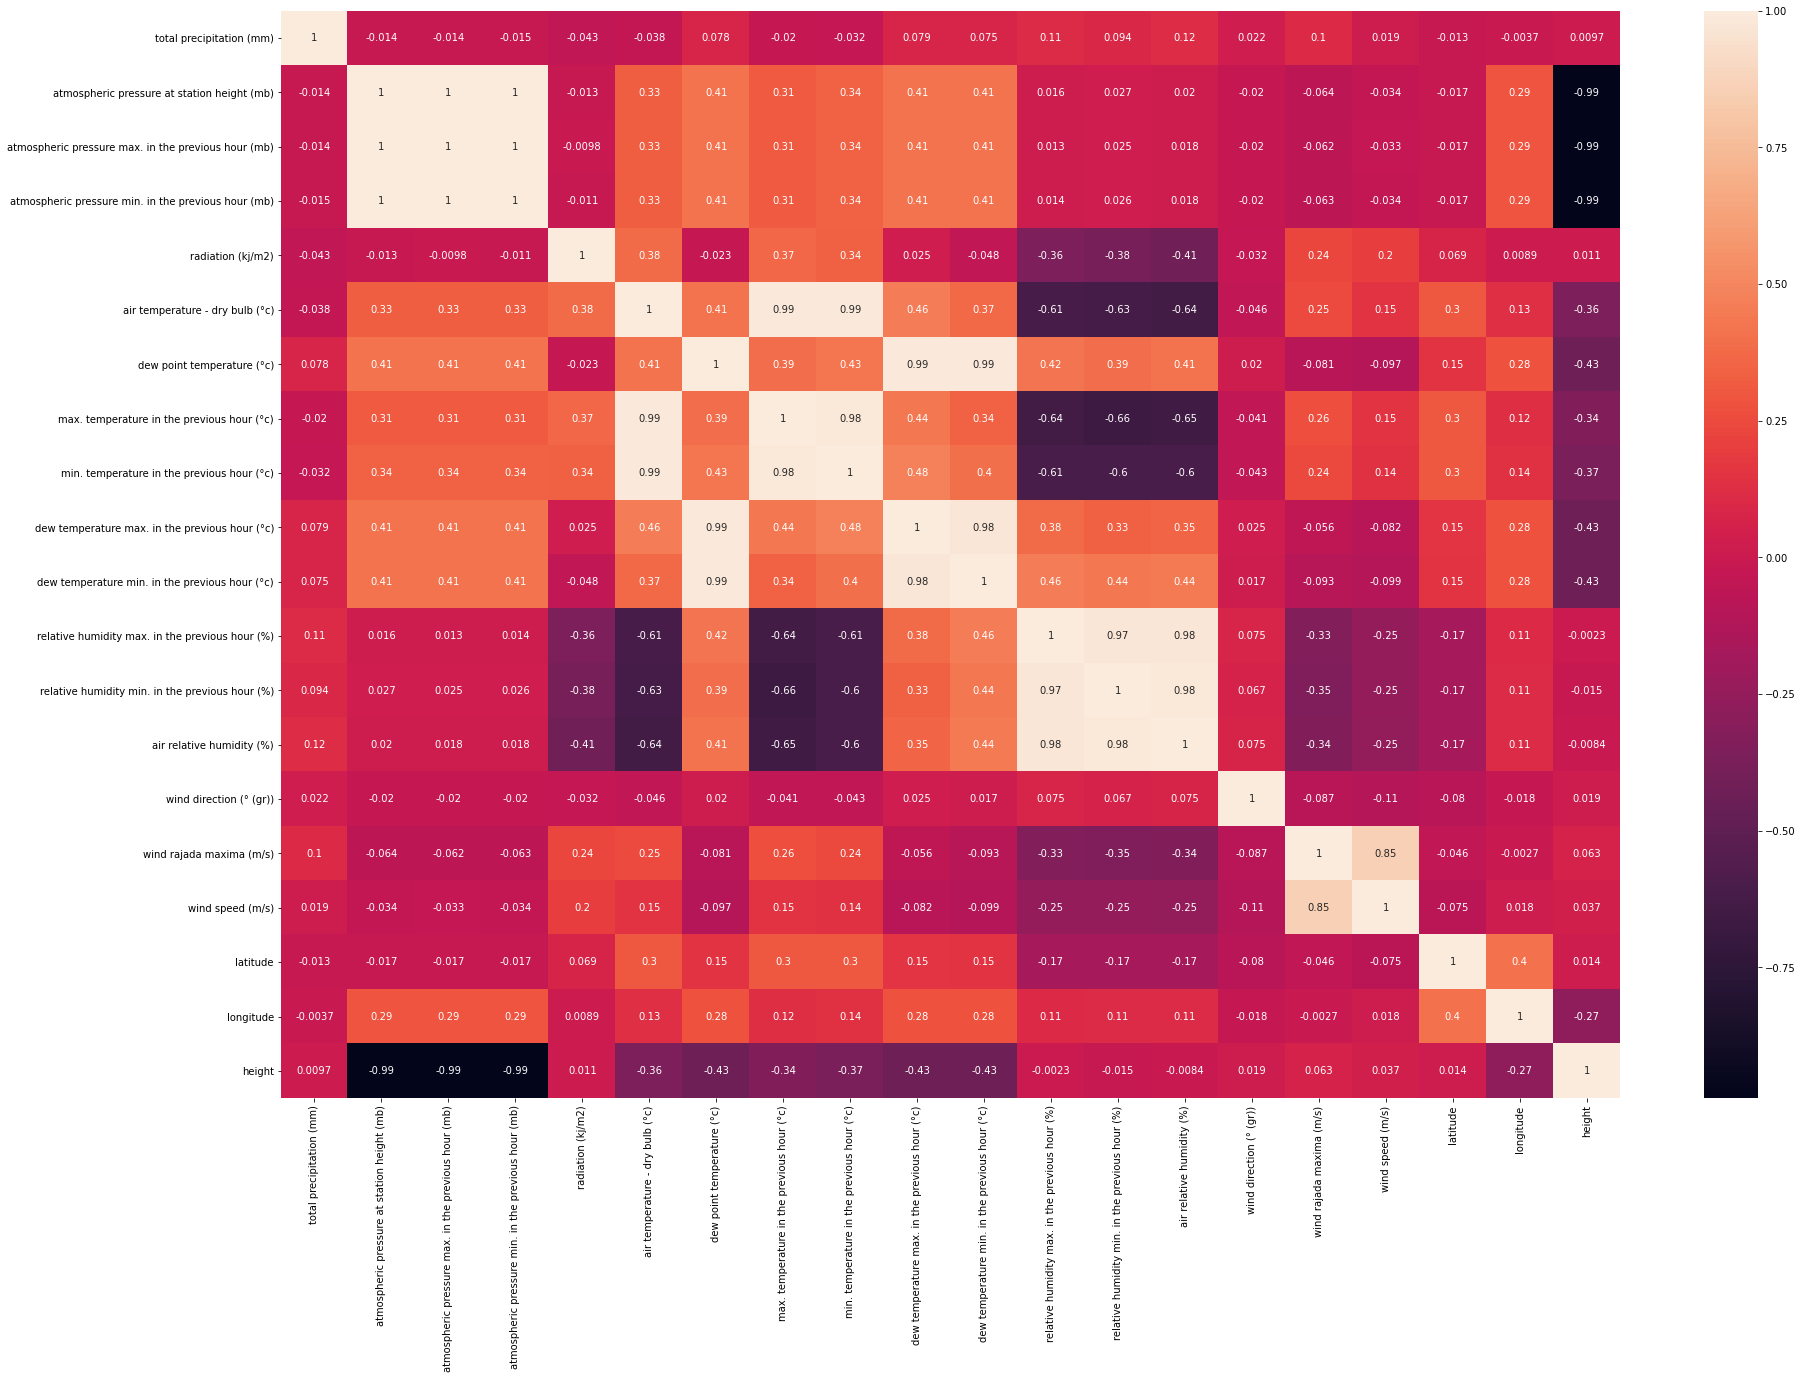

In [34]:
# Exploring the correlation between features
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(),annot = True)

In [35]:
# Find out that some of the features are highly correlated, multicolinearity will occur, so only keep one of the similar features

In [36]:
# dropping all the previous hour columns 
df.columns

Index(['time', 'month', 'date', 'hour', 'total precipitation (mm)',
       'atmospheric pressure at station height (mb)',
       'atmospheric pressure max. in the previous hour (mb)',
       'atmospheric pressure min. in the previous hour (mb)',
       'radiation (kj/m2)', 'air temperature - dry bulb (°c)',
       'dew point temperature (°c)',
       'max. temperature in the previous hour (°c)',
       'min. temperature in the previous hour (°c)',
       'dew temperature max. in the previous hour (°c)',
       'dew temperature min. in the previous hour (°c)',
       'relative humidity max. in the previous hour (%)',
       'relative humidity min. in the previous hour (%)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)', 'region', 'state',
       'station', 'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [37]:
df.drop(['atmospheric pressure max. in the previous hour (mb)','atmospheric pressure min. in the previous hour (mb)','max. temperature in the previous hour (°c)',
       'min. temperature in the previous hour (°c)','dew temperature max. in the previous hour (°c)',
       'dew temperature min. in the previous hour (°c)',
       'relative humidity max. in the previous hour (%)',
       'relative humidity min. in the previous hour (%)',],axis = 1,inplace = True)







<AxesSubplot:>

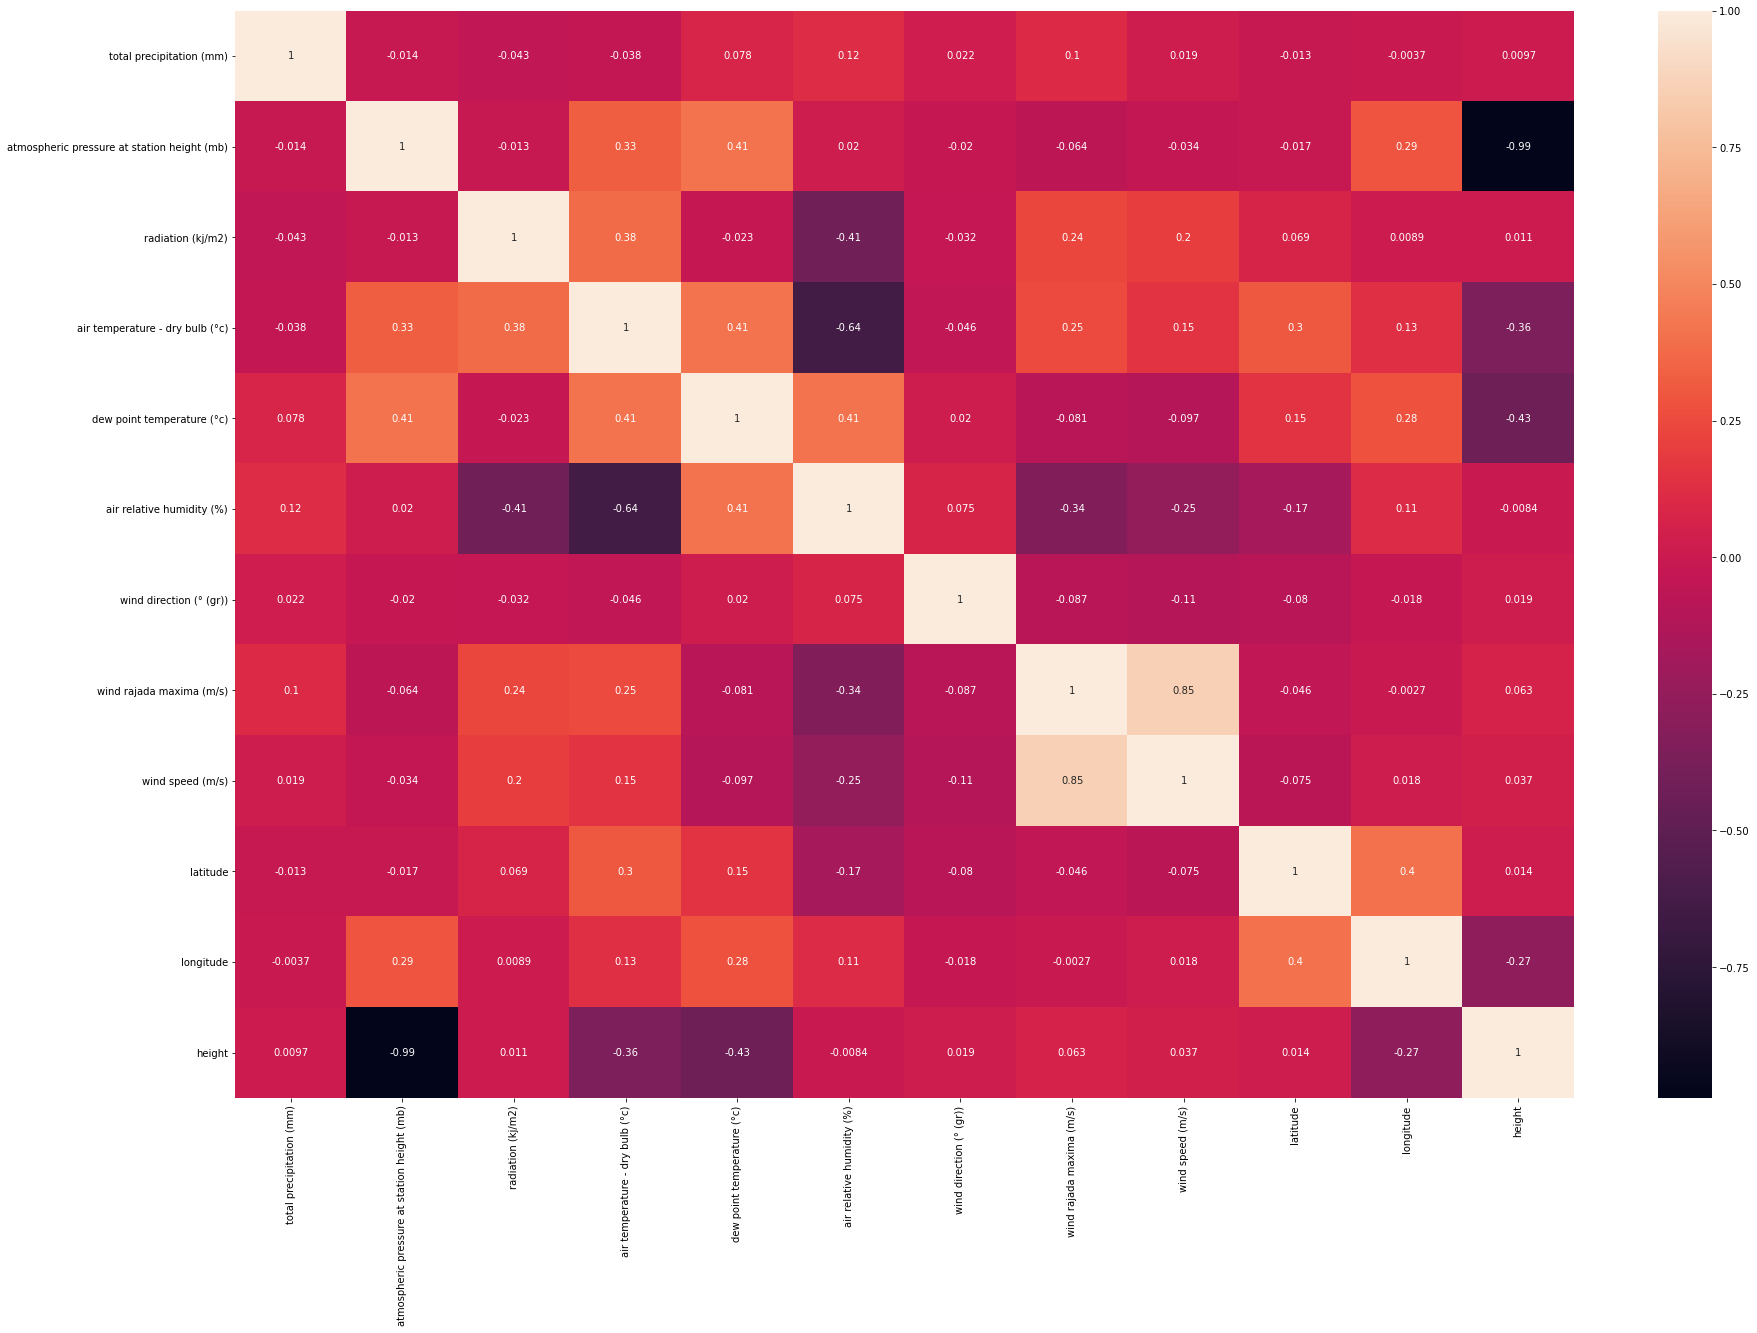

In [38]:
# Now the heatmap should contain no highly correlated features
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(),annot = True)

In [39]:
# 'atmospheric pressure at station height (mb)', and 'height' are highly correlated too , I will only keep height 
df.drop(['atmospheric pressure at station height (mb)'],axis = 1, inplace = True)

In [40]:
df.columns

Index(['time', 'month', 'date', 'hour', 'total precipitation (mm)',
       'radiation (kj/m2)', 'air temperature - dry bulb (°c)',
       'dew point temperature (°c)', 'air relative humidity (%)',
       'wind direction (° (gr))', 'wind rajada maxima (m/s)',
       'wind speed (m/s)', 'region', 'state', 'station', 'station_code',
       'latitude', 'longitude', 'height'],
      dtype='object')

/Users/cy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='air temperature - dry bulb (°c)', ylabel='Density'>

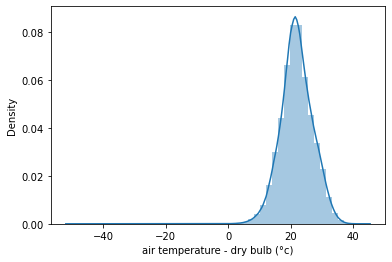

In [41]:
#getting the distribution of the air temp
sns.distplot(df['air temperature - dry bulb (°c)'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15326952 entries, 0 to 15345215
Data columns (total 19 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   time                             datetime64[ns]
 1   month                            object        
 2   date                             object        
 3   hour                             object        
 4   total precipitation (mm)         float64       
 5   radiation (kj/m2)                float64       
 6   air temperature - dry bulb (°c)  float64       
 7   dew point temperature (°c)       float64       
 8   air relative humidity (%)        float64       
 9   wind direction (° (gr))          float64       
 10  wind rajada maxima (m/s)         float64       
 11  wind speed (m/s)                 float64       
 12  region                           object        
 13  state                            object        
 14  station                         

In [43]:
df['region'].nunique()

1

In [44]:
df['time'].head()

0   2000-05-07 00:00:00
1   2000-05-07 01:00:00
2   2000-05-07 02:00:00
3   2000-05-07 03:00:00
4   2000-05-07 04:00:00
Name: time, dtype: datetime64[ns]

In [45]:
df['date'].head()

0    2000-05-07
1    2000-05-07
2    2000-05-07
3    2000-05-07
4    2000-05-07
Name: date, dtype: object

In [46]:
# make a copy of the dataframe
new_df = df.copy()
new_df.drop(columns=['station_code','region',],inplace = True)

In [47]:
# Dropping station_code because station and station_code is interchangable , dropping one of these two columns to avoid multicolliarity
# Dropping region because we are only doing South-East
# Dropping time because date and hour can represent it 
# make a copy of the dataframe
df.drop(columns=['station_code','region','time'],inplace = True)

In [48]:
# linear regression doesn't take time variables, so will take it out
df.drop(columns = ['date'],inplace = True)

In [49]:
len(df)

15326952

In [50]:
df['station'].unique()

array(['ECOLOGIA AGRICOLA', 'BAURU', 'UBERLANDIA', 'ALMENARA',
       'CAMPOS DO JORDAO', 'MONTES CLAROS', 'MARAMBAIA', 'BARBACENA',
       'ARAXA', 'XEREM', 'CAMBUCI', 'FRANCA', 'PRESIDENTE PRUDENTE',
       'MONTE VERDE', 'VICOSA', 'CONCEICAO DAS ALAGOAS', 'PATROCINIO',
       'SAO PAULO - MIRANTE', 'SACRAMENTO', 'RESENDE', 'ITUIUTABA',
       'LINS', 'TIMOTEO', 'SAO MIGUEL ARCANJO', 'SERRA DOS AIMORES',
       'VALENCA', 'VITORIA', 'AVARE', 'TAUBATE', 'OURO BRANCO',
       'PAMPULHA', 'FORMIGA', 'CAMPINA VERDE', 'MACAE', 'CALDAS',
       'SAO CARLOS', 'OURINHOS', 'MARIA DA FE', 'VOTUPORANGA', 'ALEGRE',
       'ARRAIAL DO CABO', 'MURIAE', 'TRES MARIAS', 'SOROCABA', 'CAMPOS',
       'ALFREDO CHAVES', 'ITAPEVA', 'PASSOS', 'CURVELO', 'PARATI',
       'RANCHARIA', 'SAO JOAO DEL REI', 'TERESOPOLIS', 'PIRACICABA',
       'TEOFILO OTONI', 'IGUAPE', 'VARGINHA', 'PICO DO COUTO',
       'SAO MATEUS', 'LINHARES', 'PIRAPORA', 'SANTA TERESA',
       'VILA MILITAR', 'DORES DO INDAIA', 'AIMORES', '

In [51]:
df[df['station']=='CASA BRANCA']

,month,hour,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),state,station,latitude,longitude,height
1266600,6,00:00,0.029708,2.500000,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143,SP,CASA BRANCA,-21.779722,-47.079722,730.00
1266601,6,01:00,0.008488,3.500000,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557,SP,CASA BRANCA,-21.779722,-47.079722,730.00
1266602,6,02:00,0.036745,1.000000,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278,SP,CASA BRANCA,-21.779722,-47.079722,730.00
1266603,6,03:00,0.039164,1.500000,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355,SP,CASA BRANCA,-21.779722,-47.079722,730.00
1266604,6,04:00,0.064062,1.000000,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927,SP,CASA BRANCA,-21.779722,-47.079722,730.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15232117,4,19:00,0.128351,1083.012920,26.870103,14.690464,49.703608,168.685567,5.243041,1.601031,SP,CASA BRANCA,-21.780560,-47.075280,734.15
15232118,4,20:00,0.146770,572.661499,25.868734,15.017313,53.609819,157.594315,4.689406,1.285788,SP,CASA BRANCA,-21.780560,-47.075280,734.15
15232119,4,21:00,0.056477,99.777202,24.005699,15.657513,61.300518,151.243523,3.686788,0.803886,SP,CASA BRANCA,-21.780560,-47.075280,734.15
15232120,4,22:00,0.130366,41.181818,23.019372,15.722775,65.091623,147.871728,2.948429,0.860471,SP,CASA BRANCA,-21.780560,-47.075280,734.15


In [52]:
# Since too many data points is very hard to deal with , I will only examine one station first to see if the model is working
casa = df[df['station']=='CASA BRANCA'].reset_index(drop=True)

In [53]:
casa.head()

,month,hour,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),state,station,latitude,longitude,height
0,6,00:00,0.029708,2.5,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143,SP,CASA BRANCA,-21.779722,-47.079722,730.0
1,6,01:00,0.008488,3.5,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557,SP,CASA BRANCA,-21.779722,-47.079722,730.0
2,6,02:00,0.036745,1.0,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278,SP,CASA BRANCA,-21.779722,-47.079722,730.0
3,6,03:00,0.039164,1.5,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355,SP,CASA BRANCA,-21.779722,-47.079722,730.0
4,6,04:00,0.064062,1.0,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927,SP,CASA BRANCA,-21.779722,-47.079722,730.0


In [54]:
# dropping state,station,latitude,longitude,and height becase I am only examing the same station
casa.drop(columns=['state','station','latitude','longitude','height'],axis = 1,inplace = True)
casa.head()

,month,hour,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
0,6,00:00,0.029708,2.5,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143
1,6,01:00,0.008488,3.5,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557
2,6,02:00,0.036745,1.0,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278
3,6,03:00,0.039164,1.5,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355
4,6,04:00,0.064062,1.0,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927


In [55]:
casa = pd.get_dummies(casa,drop_first = True)

In [56]:
casa.head()

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),month_10,month_11,...,hour_14:00,hour_15:00,hour_16:00,hour_17:00,hour_18:00,hour_19:00,hour_20:00,hour_21:00,hour_22:00,hour_23:00
0,0.029708,2.5,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008488,3.5,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.036745,1.0,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.039164,1.5,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.064062,1.0,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X,y = casa.drop('air temperature - dry bulb (°c)',axis = 1), casa['air temperature - dry bulb (°c)']

In [58]:
kf = KFold(n_splits = 5 ,shuffle=True)

In [59]:
lm = LinearRegression()

In [60]:
# lets try with lasso and ridge
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
std = StandardScaler()

In [64]:
# the r2 score of Lasso is very low that indicates all the features from the dataset are useful
# the r2 score of Ridge and Linear Regression are relatively similar, I will take the slightly higher one - linear regression 

In [65]:
# Lets try with standard scaler
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25)

In [306]:
lm_model = lm.fit(X_train,y_train)


In [308]:
list(zip(X_train.columns,lm_model.coef_))

[('total precipitation (mm)', 0.05944097052903778),
 ('radiation (kj/m2)', 0.00031951976887288104),
 ('dew point temperature (°c)', 0.8313592015917226),
 ('air relative humidity (%)', -0.2449086272004449),
 ('wind direction (° (gr))', 0.00018061813675986855),
 ('wind rajada maxima (m/s)', 0.02049962266303211),
 ('wind speed (m/s)', -0.09865375729739277),
 ('month_10', -0.18284395779164528),
 ('month_11', -0.32004385333475655),
 ('month_12', -0.11296664233555415),
 ('month_2', -0.03194414437227837),
 ('month_3', -0.15104114999549337),
 ('month_4', -0.551443730596061),
 ('month_5', -1.1141273337326931),
 ('month_6', -1.289169302148215),
 ('month_7', -1.4330190275527068),
 ('month_8', -0.8861460134225473),
 ('month_9', -0.1744752684621493),
 ('hour_01:00', -0.06995762549812908),
 ('hour_02:00', -0.04912526621784963),
 ('hour_03:00', -0.042202127579633694),
 ('hour_04:00', -0.006567177643111006),
 ('hour_05:00', 0.0223228999352225),
 ('hour_06:00', 0.04718954096017838),
 ('hour_07:00', 0.0

In [66]:
std.fit(X_train.values)

StandardScaler()

In [67]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [68]:
alphavec = 10 * np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec,cv = 5)
lasso_model.fit(X_tr,y_train)

/Users/cy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36531.64977699856, tolerance: 129.15284395623235
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=array([-20.        , -19.79899497, -19.59798995, -19.39698492,
       -19.1959799 , -18.99497487, -18.79396985, -18.59296482,
       -18.3919598 , -18.19095477, -17.98994975, -17.78894472,
       -17.5879397 , -17.38693467, -17.18592965, -16.98492462,
       -16.7839196 , -16.58291457, -16.38190955, -16.18090452,
       -15.9798995 , -15.77889447, -15.57788945, -15.37688442,
       -15.1758794 , -14.97487437, -14....
        13.76884422,  13.96984925,  14.17085427,  14.3718593 ,
        14.57286432,  14.77386935,  14.97487437,  15.1758794 ,
        15.37688442,  15.57788945,  15.77889447,  15.9798995 ,
        16.18090452,  16.38190955,  16.58291457,  16.7839196 ,
        16.98492462,  17.18592965,  17.38693467,  17.5879397 ,
        17.78894472,  17.98994975,  18.19095477,  18.3919598 ,
        18.59296482,  18.79396985,  18.99497487,  19.1959799 ,
        19.39698492,  19.59798995,  19.79899497,  20.        ]),
        cv=5)

In [69]:
#best alpha to use on lasso model is close to 0.1
lasso_model.alpha_

0.10050251256281229

In [70]:
#standardize coefficients using the best alpha
list(zip(X_train.columns,lasso_model.coef_))

[('total precipitation (mm)', 0.0),
 ('radiation (kj/m2)', 0.273223297880176),
 ('dew point temperature (°c)', 3.5032353425240896),
 ('air relative humidity (%)', -4.898747575928263),
 ('wind direction (° (gr))', 0.0),
 ('wind rajada maxima (m/s)', 0.0),
 ('wind speed (m/s)', -0.0),
 ('month_10', 0.0),
 ('month_11', 0.0),
 ('month_12', 0.0),
 ('month_2', 0.0),
 ('month_3', 0.0),
 ('month_4', -0.0),
 ('month_5', -0.10836010563252327),
 ('month_6', -0.15617157175510277),
 ('month_7', -0.20189713577504265),
 ('month_8', -0.049592476459258995),
 ('month_9', 0.0),
 ('hour_01:00', -0.0),
 ('hour_02:00', -0.0),
 ('hour_03:00', -0.0),
 ('hour_04:00', -0.0),
 ('hour_05:00', -0.0),
 ('hour_06:00', -0.0),
 ('hour_07:00', -0.0),
 ('hour_08:00', -0.0),
 ('hour_09:00', -0.0),
 ('hour_10:00', -0.0),
 ('hour_11:00', -0.0),
 ('hour_12:00', -0.0021554583740775353),
 ('hour_13:00', -0.0),
 ('hour_14:00', -0.0),
 ('hour_15:00', 0.0),
 ('hour_16:00', 0.0),
 ('hour_17:00', 0.059008519691858045),
 ('hour_18:

In [71]:
from sklearn.metrics import r2_score

In [72]:
lasso_set_pred = lasso_model.predict(X_te)
r2_score(y_test,lasso_set_pred)

0.9464285657716874

In [73]:
alphavec = 10 * np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec,cv = 5)
ridge_model.fit(X_tr,y_train)

RidgeCV(alphas=array([-20.        , -19.79899497, -19.59798995, -19.39698492,
       -19.1959799 , -18.99497487, -18.79396985, -18.59296482,
       -18.3919598 , -18.19095477, -17.98994975, -17.78894472,
       -17.5879397 , -17.38693467, -17.18592965, -16.98492462,
       -16.7839196 , -16.58291457, -16.38190955, -16.18090452,
       -15.9798995 , -15.77889447, -15.57788945, -15.37688442,
       -15.1758794 , -14.97487437, -14....
        13.76884422,  13.96984925,  14.17085427,  14.3718593 ,
        14.57286432,  14.77386935,  14.97487437,  15.1758794 ,
        15.37688442,  15.57788945,  15.77889447,  15.9798995 ,
        16.18090452,  16.38190955,  16.58291457,  16.7839196 ,
        16.98492462,  17.18592965,  17.38693467,  17.5879397 ,
        17.78894472,  17.98994975,  18.19095477,  18.3919598 ,
        18.59296482,  18.79396985,  18.99497487,  19.1959799 ,
        19.39698492,  19.59798995,  19.79899497,  20.        ]),
        cv=5)

In [74]:
# best alpha to use on ridge is 0.7
ridge_model.alpha_

0.9045226130653283

In [75]:
list(zip(X_train.columns,ridge_model.coef_))

[('total precipitation (mm)', 0.05493309263721535),
 ('radiation (kj/m2)', 0.28417834137738646),
 ('dew point temperature (°c)', 3.4960463004452103),
 ('air relative humidity (%)', -4.951713965625774),
 ('wind direction (° (gr))', 0.01854896453733919),
 ('wind rajada maxima (m/s)', 0.047197633996320876),
 ('wind speed (m/s)', -0.11302347071085542),
 ('month_10', -0.051187602963513414),
 ('month_11', -0.08845144919568727),
 ('month_12', -0.03152301857618023),
 ('month_2', -0.008550355261621618),
 ('month_3', -0.04218223450607217),
 ('month_4', -0.1526372969560155),
 ('month_5', -0.3019237453863316),
 ('month_6', -0.3481812097562371),
 ('month_7', -0.39985352537347013),
 ('month_8', -0.24791591873441285),
 ('month_9', -0.04809956511862947),
 ('hour_01:00', -0.013938878948664885),
 ('hour_02:00', -0.009949915763848367),
 ('hour_03:00', -0.00842793979243046),
 ('hour_04:00', -0.0013530936288886173),
 ('hour_05:00', 0.004382101311873218),
 ('hour_06:00', 0.009350426618610776),
 ('hour_07:00

In [76]:
ridge_set_pred = ridge_model.predict(X_te)
r2_score(y_test,ridge_set_pred)

0.9539270926051644

In [77]:
print('Lasso ', r2_score(y_test,lasso_set_pred))
print('Ridge ', r2_score(y_test,ridge_set_pred))
print('Linear Regression ',np.mean(cross_val_score(lm,X,y,cv=kf,scoring='r2')))

Lasso  0.9464285657716874
Ridge  0.9539270926051644
Linear Regression  0.9527950011092168


In [78]:
# Linear is the best model after standardizing , Will use Linearregression to predict the future 

In [79]:
# The ridge model takes the all the features and generate the air temperature 
# but what if I want to predict based on date?


In [80]:
#using the same casa branca station
ca = new_df[new_df['station']== 'CASA BRANCA'].reset_index(drop = True)

In [81]:
ca

,time,month,date,hour,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),state,station,latitude,longitude,height
0,2007-06-25 00:00:00,6,2007-06-25,00:00,0.029708,2.500000,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143,SP,CASA BRANCA,-21.779722,-47.079722,730.00
1,2007-06-25 01:00:00,6,2007-06-25,01:00,0.008488,3.500000,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557,SP,CASA BRANCA,-21.779722,-47.079722,730.00
2,2007-06-25 02:00:00,6,2007-06-25,02:00,0.036745,1.000000,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278,SP,CASA BRANCA,-21.779722,-47.079722,730.00
3,2007-06-25 03:00:00,6,2007-06-25,03:00,0.039164,1.500000,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355,SP,CASA BRANCA,-21.779722,-47.079722,730.00
4,2007-06-25 04:00:00,6,2007-06-25,04:00,0.064062,1.000000,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927,SP,CASA BRANCA,-21.779722,-47.079722,730.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121411,2021-04-30 19:00:00,4,2021-04-30,19:00,0.128351,1083.012920,26.870103,14.690464,49.703608,168.685567,5.243041,1.601031,SP,CASA BRANCA,-21.780560,-47.075280,734.15
121412,2021-04-30 20:00:00,4,2021-04-30,20:00,0.146770,572.661499,25.868734,15.017313,53.609819,157.594315,4.689406,1.285788,SP,CASA BRANCA,-21.780560,-47.075280,734.15
121413,2021-04-30 21:00:00,4,2021-04-30,21:00,0.056477,99.777202,24.005699,15.657513,61.300518,151.243523,3.686788,0.803886,SP,CASA BRANCA,-21.780560,-47.075280,734.15
121414,2021-04-30 22:00:00,4,2021-04-30,22:00,0.130366,41.181818,23.019372,15.722775,65.091623,147.871728,2.948429,0.860471,SP,CASA BRANCA,-21.780560,-47.075280,734.15


In [82]:
#dropping the month , date, hour, state, station,latitude, longitude, height because we are only focusing on one station
ca.drop(columns=['month','date','hour','station','state','latitude','longitude','height'],axis = 1,inplace = True)



In [83]:
ca.head()

,time,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
0,2007-06-25 00:00:00,0.029708,2.5,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143
1,2007-06-25 01:00:00,0.008488,3.5,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557
2,2007-06-25 02:00:00,0.036745,1.0,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278
3,2007-06-25 03:00:00,0.039164,1.5,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355
4,2007-06-25 04:00:00,0.064062,1.0,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927


In [91]:
# let's try to see which arima model and order should we use 
ca_df = ca[['time','air temperature - dry bulb (°c)']].reset_index(drop = True)

In [92]:
ca_df.set_index('time',inplace = True,drop = True)

In [93]:
ca_df

,air temperature - dry bulb (°c)
time,
2007-06-25 00:00:00,18.306101
2007-06-25 01:00:00,17.714854
2007-06-25 02:00:00,17.049606
2007-06-25 03:00:00,16.529765
2007-06-25 04:00:00,16.054688
...,...
2021-04-30 19:00:00,26.870103
2021-04-30 20:00:00,25.868734
2021-04-30 21:00:00,24.005699


In [94]:
from pmdarima.arima import auto_arima

In [95]:
auto_arima(ca_df,seasonal = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               121416
Model:               SARIMAX(2, 1, 4)   Log Likelihood             -171053.883
Date:                Tue, 30 Aug 2022   AIC                         342121.766
Time:                        02:41:48   BIC                         342189.714
Sample:                             0   HQIC                        342142.208
                             - 121416                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9147      0.001   3021.949      0.000       1.913       1.916
ar.L2         -0.9817      0.001  -1554.421      0.000      -0.983      -0.980
ma.L1         -1.7668      0.002  -1135.295      0.000      -1.770      -1.764
ma.L2          0.7666      0.003    251.569      0.000       0.761       0.773
ma.L3         -0.0227      0.004     -6.097      0.000      -0.030      -0.015
ma.L4          0.0655      0.002     30.836      0.000       0.061       0.070
sigma2         0.9776      0.002    547.136      0.000       0.974       0.981
===================================================================================
Ljung-Box (L1) (Q):                   2.27   Jarque-Bera (JB):            786226.91
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
#SARIMAX(2, 1, 4) is the best model , so I will use sarimax to predict 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [99]:
ca_df

,air temperature - dry bulb (°c)
time,
2007-06-25 00:00:00,18.306101
2007-06-25 01:00:00,17.714854
2007-06-25 02:00:00,17.049606
2007-06-25 03:00:00,16.529765
2007-06-25 04:00:00,16.054688
...,...
2021-04-30 19:00:00,26.870103
2021-04-30 20:00:00,25.868734
2021-04-30 21:00:00,24.005699


In [108]:
# for speeding up purpose , I will get the average temperature for each day 

In [109]:
ca_df.reset_index(inplace = True)
ca_df

,time,air temperature - dry bulb (°c)
0,2007-06-25 00:00:00,18.306101
1,2007-06-25 01:00:00,17.714854
2,2007-06-25 02:00:00,17.049606
3,2007-06-25 03:00:00,16.529765
4,2007-06-25 04:00:00,16.054688
...,...,...
121411,2021-04-30 19:00:00,26.870103
121412,2021-04-30 20:00:00,25.868734
121413,2021-04-30 21:00:00,24.005699
121414,2021-04-30 22:00:00,23.019372


In [110]:
ca_df['time'].head()

0   2007-06-25 00:00:00
1   2007-06-25 01:00:00
2   2007-06-25 02:00:00
3   2007-06-25 03:00:00
4   2007-06-25 04:00:00
Name: time, dtype: datetime64[ns]

In [117]:
ca_df['time'][0].date()

datetime.date(2007, 6, 25)

In [119]:
ca_df['date'] = ca_df['time'].apply(lambda x:x.date())

In [121]:
ca_df

,time,air temperature - dry bulb (°c),date
0,2007-06-25 00:00:00,18.306101,2007-06-25
1,2007-06-25 01:00:00,17.714854,2007-06-25
2,2007-06-25 02:00:00,17.049606,2007-06-25
3,2007-06-25 03:00:00,16.529765,2007-06-25
4,2007-06-25 04:00:00,16.054688,2007-06-25
...,...,...,...
121411,2021-04-30 19:00:00,26.870103,2021-04-30
121412,2021-04-30 20:00:00,25.868734,2021-04-30
121413,2021-04-30 21:00:00,24.005699,2021-04-30
121414,2021-04-30 22:00:00,23.019372,2021-04-30


In [123]:
ca_df.drop(columns = ['time'],axis = 1 , inplace = True)

In [124]:
ca_df.head()

,air temperature - dry bulb (°c),date
0,18.306101,2007-06-25
1,17.714854,2007-06-25
2,17.049606,2007-06-25
3,16.529765,2007-06-25
4,16.054688,2007-06-25


In [128]:
df = ca_df.groupby('date')['air temperature - dry bulb (°c)'].mean().reset_index()

In [130]:
df.set_index('date',inplace = True)

In [131]:
df

,air temperature - dry bulb (°c)
date,
2007-06-25,18.831502
2007-06-26,18.831502
2007-06-27,18.831502
2007-06-28,20.012500
2007-06-29,19.845833
...,...
2021-04-26,22.147108
2021-04-27,22.147108
2021-04-28,22.147108


In [134]:
ca

,time,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
0,2007-06-25 00:00:00,0.029708,2.500000,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143
1,2007-06-25 01:00:00,0.008488,3.500000,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557
2,2007-06-25 02:00:00,0.036745,1.000000,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278
3,2007-06-25 03:00:00,0.039164,1.500000,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355
4,2007-06-25 04:00:00,0.064062,1.000000,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927
...,...,...,...,...,...,...,...,...,...
121411,2021-04-30 19:00:00,0.128351,1083.012920,26.870103,14.690464,49.703608,168.685567,5.243041,1.601031
121412,2021-04-30 20:00:00,0.146770,572.661499,25.868734,15.017313,53.609819,157.594315,4.689406,1.285788
121413,2021-04-30 21:00:00,0.056477,99.777202,24.005699,15.657513,61.300518,151.243523,3.686788,0.803886
121414,2021-04-30 22:00:00,0.130366,41.181818,23.019372,15.722775,65.091623,147.871728,2.948429,0.860471


In [135]:
ca['date'] = ca['time'].apply(lambda x:x.date())

In [137]:
ca.drop(columns =['time'],inplace = True )

In [138]:
ca.head()

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),date
0,0.029708,2.5,18.306101,12.225199,68.923077,160.538462,3.113793,1.098143,2007-06-25
1,0.008488,3.5,17.714854,12.148011,71.031830,160.299735,3.140849,1.070557,2007-06-25
2,0.036745,1.0,17.049606,12.172703,73.989501,167.729659,2.960892,0.874278,2007-06-25
3,0.039164,1.5,16.529765,12.170757,76.352480,170.253264,2.788512,0.808355,2007-06-25
4,0.064062,1.0,16.054688,12.174740,78.562500,169.351562,2.753906,0.766927,2007-06-25


In [139]:
ca.columns

Index(['total precipitation (mm)', 'radiation (kj/m2)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)', 'date'],
      dtype='object')

In [294]:
df = ca.groupby('date')[['total precipitation (mm)', 'radiation (kj/m2)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)', 'date']].mean()

In [261]:
df.head()

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
date,,,,,,,,
2007-06-25,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-26,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-27,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-28,0.000000,574.053472,20.012500,12.562500,64.375000,233.625000,3.404167,1.087500
2007-06-29,0.000000,619.967688,19.845833,13.154167,66.541667,203.791667,2.270833,0.783333


In [262]:
sim_df = df[['air temperature - dry bulb (°c)']]

In [263]:
sim_df

,air temperature - dry bulb (°c)
date,
2007-06-25,18.831502
2007-06-26,18.831502
2007-06-27,18.831502
2007-06-28,20.012500
2007-06-29,19.845833
...,...
2021-04-26,22.147108
2021-04-27,22.147108
2021-04-28,22.147108


In [264]:
auto_arima(sim_df,seasonal = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5059
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -8956.465
Date:                Tue, 30 Aug 2022   AIC                          17922.931
Time:                        19:13:48   BIC                          17955.574
Sample:                    06-25-2007   HQIC                         17934.365
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4340      0.035     12.510      0.000       0.366       0.502
ma.L1         -0.4724      0.035    -13.608      0.000      -0.540      -0.404
ma.L2         -0.3182      0.014    -22.647      0.000      -0.346      -0.291
ma.L3         -0.0948      0.022     -4.303      0.000      -0.138      -0.052
sigma2         2.0207      0.030     67.140      0.000       1.962       2.080
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1170.36
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [265]:
len(sim_df)

5059

In [148]:
df.columns

Index(['total precipitation (mm)', 'radiation (kj/m2)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)'],
      dtype='object')

In [295]:
df.reset_index(inplace = True)


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             5059 non-null   object 
 1   total precipitation (mm)         5059 non-null   float64
 2   radiation (kj/m2)                5059 non-null   float64
 3   air temperature - dry bulb (°c)  5059 non-null   float64
 4   dew point temperature (°c)       5059 non-null   float64
 5   air relative humidity (%)        5059 non-null   float64
 6   wind direction (° (gr))          5059 non-null   float64
 7   wind rajada maxima (m/s)         5059 non-null   float64
 8   wind speed (m/s)                 5059 non-null   float64
dtypes: float64(8), object(1)
memory usage: 355.8+ KB


In [297]:
df['date'] = pd.to_datetime(df['date'])

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             5059 non-null   datetime64[ns]
 1   total precipitation (mm)         5059 non-null   float64       
 2   radiation (kj/m2)                5059 non-null   float64       
 3   air temperature - dry bulb (°c)  5059 non-null   float64       
 4   dew point temperature (°c)       5059 non-null   float64       
 5   air relative humidity (%)        5059 non-null   float64       
 6   wind direction (° (gr))          5059 non-null   float64       
 7   wind rajada maxima (m/s)         5059 non-null   float64       
 8   wind speed (m/s)                 5059 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 355.8 KB


In [299]:
df.set_index('date',inplace = True)

In [300]:
df.head()

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
date,,,,,,,,
2007-06-25,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-26,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-27,0.038431,468.308100,18.831502,12.094698,67.923331,169.479084,3.682609,1.221920
2007-06-28,0.000000,574.053472,20.012500,12.562500,64.375000,233.625000,3.404167,1.087500
2007-06-29,0.000000,619.967688,19.845833,13.154167,66.541667,203.791667,2.270833,0.783333


/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

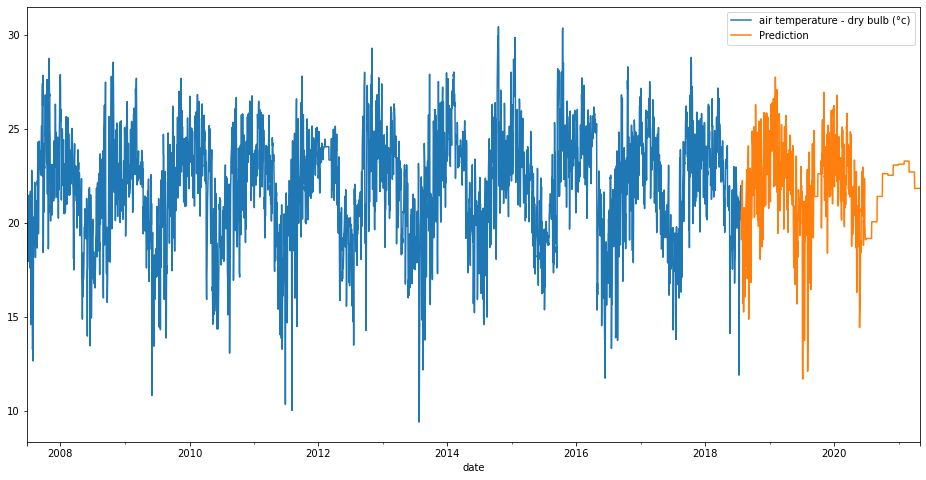

In [301]:
train_df = df.iloc[:4047]
test_df = df.iloc[4047:]
mod = SARIMAX(train_df['air temperature - dry bulb (°c)'],order = (1,1,3),exog = train_df[['total precipitation (mm)', 'radiation (kj/m2)',
        'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)']])
res = mod.fit()
start = len(train_df)
end = len(train_df)+len(test_df)-1

prediction = res.forecast(1012,exog= test_df[['total precipitation (mm)', 'radiation (kj/m2)',
        'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)']]).rename('Prediction')
ax = train_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8))
prediction.plot(legend = True)

<AxesSubplot:xlabel='date'>

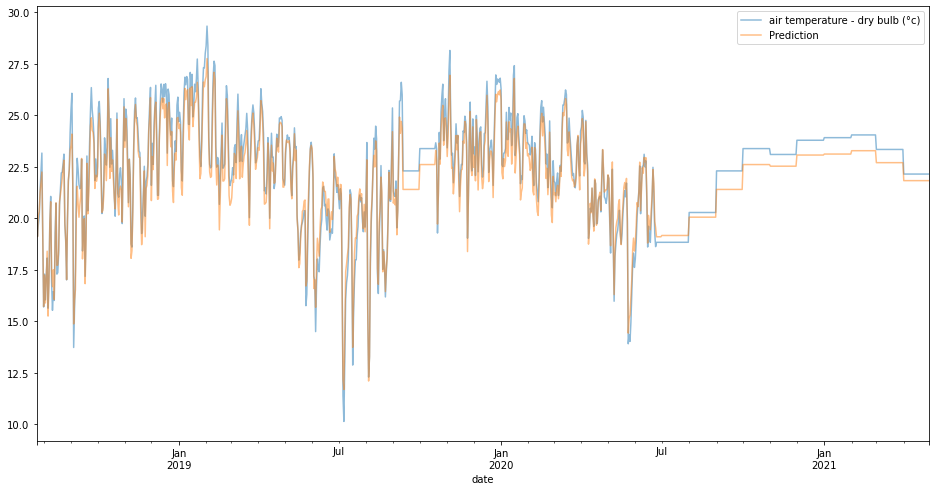

In [302]:
ax = test_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8),alpha = 0.5)
prediction.plot(legend = True,alpha=0.5)

In [280]:
r2_score(test_df['air temperature - dry bulb (°c)'],prediction)

0.9392093416079489

In [303]:
print('Lasso ', r2_score(y_test,lasso_set_pred))
print('Ridge ', r2_score(y_test,ridge_set_pred))
print('Linear Regression ',np.mean(cross_val_score(lm,X,y,cv=kf,scoring='r2')))
print('SARIMAX time series', r2_score(test_df['air temperature - dry bulb (°c)'],prediction))

Lasso  0.9464285657716874
Ridge  0.9539270926051644
Linear Regression  0.9527911659207182
SARIMAX time series 0.9392093416079489


In [287]:
prediction

2018-07-24    20.614573
2018-07-25    19.102406
2018-07-26    20.149100
2018-07-27    20.324891
2018-07-28    21.266286
                ...    
2021-04-26    21.827513
2021-04-27    21.827513
2021-04-28    21.827513
2021-04-29    21.827513
2021-04-30    21.827513
Freq: D, Name: Prediction, Length: 1012, dtype: float64

In [288]:
test_df['air temperature - dry bulb (°c)']

date
2018-07-24    20.137500
2018-07-25    19.120833
2018-07-26    19.695833
2018-07-27    20.066667
2018-07-28    21.345833
                ...    
2021-04-26    22.147108
2021-04-27    22.147108
2021-04-28    22.147108
2021-04-29    22.147108
2021-04-30    22.147108
Name: air temperature - dry bulb (°c), Length: 1012, dtype: float64

In [281]:
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:     air temperature - dry bulb (°c)   No. Observations:                 4047
Model:                            SARIMAX(1, 1, 3)   Log Likelihood               -2120.971
Date:                             Tue, 30 Aug 2022   AIC                           4265.943
Time:                                     19:19:37   BIC                           4341.609
Sample:                                 06-25-2007   HQIC                          4292.749
                                      - 07-23-2018                                         
Covariance Type:                               opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
total precipitation (mm)       0.1757      0.021      8.532      0.000    

In [289]:
sim_df

,air temperature - dry bulb (°c)
date,
2007-06-25,18.831502
2007-06-26,18.831502
2007-06-27,18.831502
2007-06-28,20.012500
2007-06-29,19.845833
...,...
2021-04-26,22.147108
2021-04-27,22.147108
2021-04-28,22.147108


/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

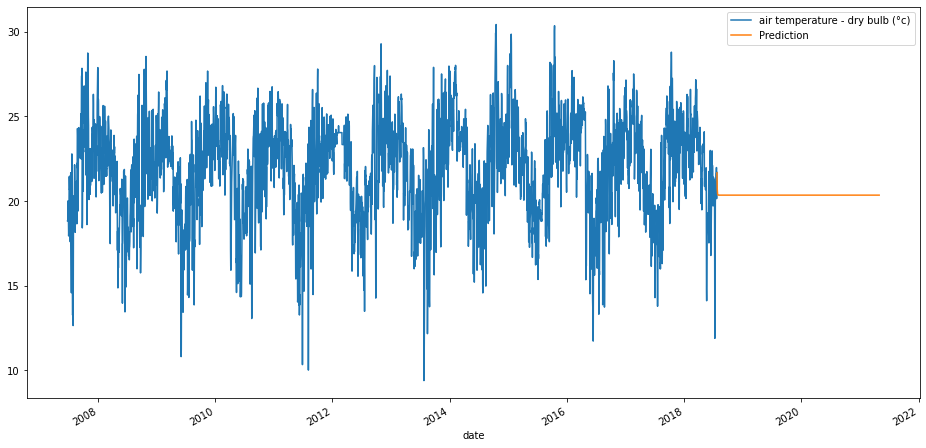

In [290]:
# try with no exogenous variables 
train_df = sim_df.iloc[:4047]
test_df = sim_df.iloc[4047:]
mod = SARIMAX(train_df['air temperature - dry bulb (°c)'],order = (1,1,3))
res = mod.fit()
start = len(train_df)
end = len(train_df)+len(test_df)-1


prediction = res.forecast(1012).rename('Prediction')
ax = train_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8))
prediction.plot(legend = True)

<AxesSubplot:xlabel='date'>

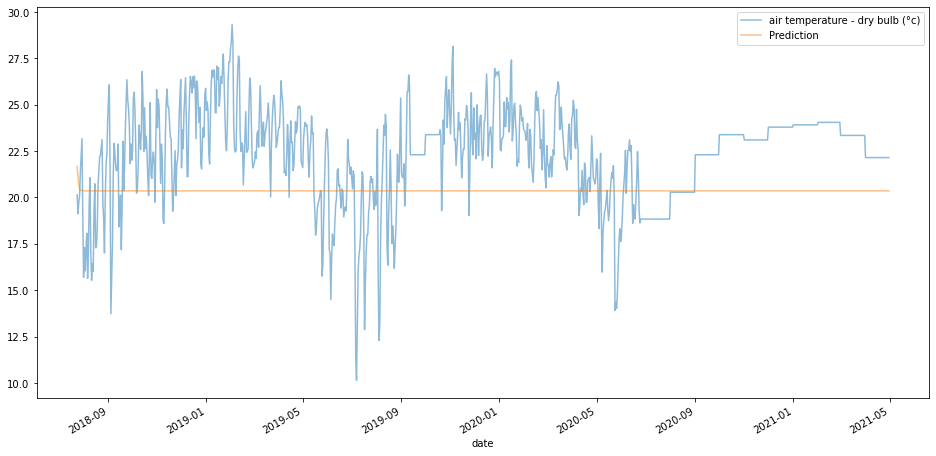

In [291]:
ax = test_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8),alpha = 0.5)
prediction.plot(legend = True,alpha=0.5)

In [175]:
# Lets try with another station 
ac = new_df[new_df['station']=='ALFREDO CHAVES']

In [176]:
ac.head()

,time,month,date,hour,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s),state,station,latitude,longitude,height
564600,2006-11-03 00:00:00,11,2006-11-03,00:00,0.0,0.041667,26.6,22.3,77.0,234.0,3.0,1.4,ES,ALFREDO CHAVES,-20.636389,-40.741389,35.0
564601,2006-11-03 01:00:00,11,2006-11-03,01:00,0.0,0.086022,25.7,22.4,82.0,208.0,3.3,1.6,ES,ALFREDO CHAVES,-20.636389,-40.741389,35.0
564602,2006-11-03 02:00:00,11,2006-11-03,02:00,0.0,0.075269,25.2,22.7,86.0,48.0,3.9,1.2,ES,ALFREDO CHAVES,-20.636389,-40.741389,35.0
564603,2006-11-03 03:00:00,11,2006-11-03,03:00,0.0,0.132653,24.9,22.7,88.0,83.0,2.7,1.7,ES,ALFREDO CHAVES,-20.636389,-40.741389,35.0
564604,2006-11-03 04:00:00,11,2006-11-03,04:00,0.0,0.123711,24.6,22.9,90.0,208.0,2.7,1.4,ES,ALFREDO CHAVES,-20.636389,-40.741389,35.0


In [178]:
len(ac)

127032

In [179]:
ac.columns

Index(['time', 'month', 'date', 'hour', 'total precipitation (mm)',
       'radiation (kj/m2)', 'air temperature - dry bulb (°c)',
       'dew point temperature (°c)', 'air relative humidity (%)',
       'wind direction (° (gr))', 'wind rajada maxima (m/s)',
       'wind speed (m/s)', 'state', 'station', 'latitude', 'longitude',
       'height'],
      dtype='object')

In [180]:
ac.drop(columns = ['time', 'month', 'hour', 'state', 'station', 'latitude', 'longitude',
       'height'],axis = 1,inplace = True)

/Users/cy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
ac.columns

Index(['date', 'total precipitation (mm)', 'radiation (kj/m2)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)'],
      dtype='object')

In [182]:
ac = ac.groupby('date')['total precipitation (mm)', 'radiation (kj/m2)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)'].mean()

<ipython-input-182-1924eb1d47eb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ac = ac.groupby('date')['total precipitation (mm)', 'radiation (kj/m2)',


In [183]:
ac

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
date,,,,,,,,
2006-11-03,0.525000,471.286862,25.670833,23.016667,85.791667,132.666667,3.345833,1.500000
2006-11-04,0.541667,191.245196,23.750000,21.691667,88.541667,130.458333,4.820833,1.883333
2006-11-05,0.154383,314.870196,21.898777,19.807223,88.117381,182.483164,3.332805,1.172235
2006-11-06,0.058333,425.161862,22.775000,20.108333,85.333333,142.375000,3.420833,1.512500
2006-11-07,0.791667,559.203529,24.279167,21.970833,87.666667,172.250000,3.350000,1.287500
...,...,...,...,...,...,...,...,...
2021-04-26,0.000000,631.885330,24.679167,20.950000,80.541667,81.833333,3.558333,1.629167
2021-04-27,0.000000,353.218664,24.787500,21.387500,81.958333,166.708333,3.150000,1.125000
2021-04-28,0.000000,428.718664,23.066667,19.566667,81.291667,149.541667,3.454167,1.379167


In [184]:
sim_ac = ac[['air temperature - dry bulb (°c)']]

In [185]:
sim_ac

,air temperature - dry bulb (°c)
date,
2006-11-03,25.670833
2006-11-04,23.750000
2006-11-05,21.898777
2006-11-06,22.775000
2006-11-07,24.279167
...,...
2021-04-26,24.679167
2021-04-27,24.787500
2021-04-28,23.066667


In [186]:
auto_arima(sim_ac,seasonal = True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5293
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -9167.106
Date:                Tue, 30 Aug 2022   AIC                          18348.212
Time:                        18:29:13   BIC                          18394.231
Sample:                    11-03-2006   HQIC                         18364.295
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1733      0.044      3.945      0.000       0.087       0.259
ar.L1          1.3702      0.042     32.614      0.000       1.288       1.452
ar.L2         -0.3773      0.041     -9.189      0.000      -0.458      -0.297
ma.L1         -0.4191      0.043     -9.784      0.000      -0.503      -0.335
ma.L2         -0.3352      0.014    -23.496      0.000      -0.363      -0.307
ma.L3         -0.0978      0.024     -4.118      0.000      -0.144      -0.051
sigma2         1.8722      0.033     57.119      0.000       1.808       1.936
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               352.99
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.42
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [214]:
ac['date'] = pd.to_datetime(ac['date'])

In [215]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             5293 non-null   datetime64[ns]
 1   total precipitation (mm)         5293 non-null   float64       
 2   radiation (kj/m2)                5293 non-null   float64       
 3   air temperature - dry bulb (°c)  5293 non-null   float64       
 4   dew point temperature (°c)       5293 non-null   float64       
 5   air relative humidity (%)        5293 non-null   float64       
 6   wind direction (° (gr))          5293 non-null   float64       
 7   wind rajada maxima (m/s)         5293 non-null   float64       
 8   wind speed (m/s)                 5293 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 372.3 KB


In [216]:
ac.set_index('date',inplace = True)

In [217]:
ac.head()

,total precipitation (mm),radiation (kj/m2),air temperature - dry bulb (°c),dew point temperature (°c),air relative humidity (%),wind direction (° (gr)),wind rajada maxima (m/s),wind speed (m/s)
date,,,,,,,,
2006-11-03,0.525000,471.286862,25.670833,23.016667,85.791667,132.666667,3.345833,1.500000
2006-11-04,0.541667,191.245196,23.750000,21.691667,88.541667,130.458333,4.820833,1.883333
2006-11-05,0.154383,314.870196,21.898777,19.807223,88.117381,182.483164,3.332805,1.172235
2006-11-06,0.058333,425.161862,22.775000,20.108333,85.333333,142.375000,3.420833,1.512500
2006-11-07,0.791667,559.203529,24.279167,21.970833,87.666667,172.250000,3.350000,1.287500


In [218]:
len(ac)*0.8

4234.400000000001

In [219]:
train_df = ac.iloc[:4234]
test_df = ac.iloc[4234:]

In [248]:
len(test_df)

1059

In [250]:

mod = SARIMAX(train_df['air temperature - dry bulb (°c)'],order = (2,0,3),exog = train_df[['total precipitation (mm)', 'radiation (kj/m2)',
        'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)']])
res = mod.fit()
start = len(train_df)
end = len(train_df)+len(test_df)-1
prediction = res.forecast(1059,exog= test_df[['total precipitation (mm)', 'radiation (kj/m2)',
        'dew point temperature (°c)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'wind rajada maxima (m/s)', 'wind speed (m/s)']]).rename('Prediction')


/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/cy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/

<AxesSubplot:xlabel='date'>

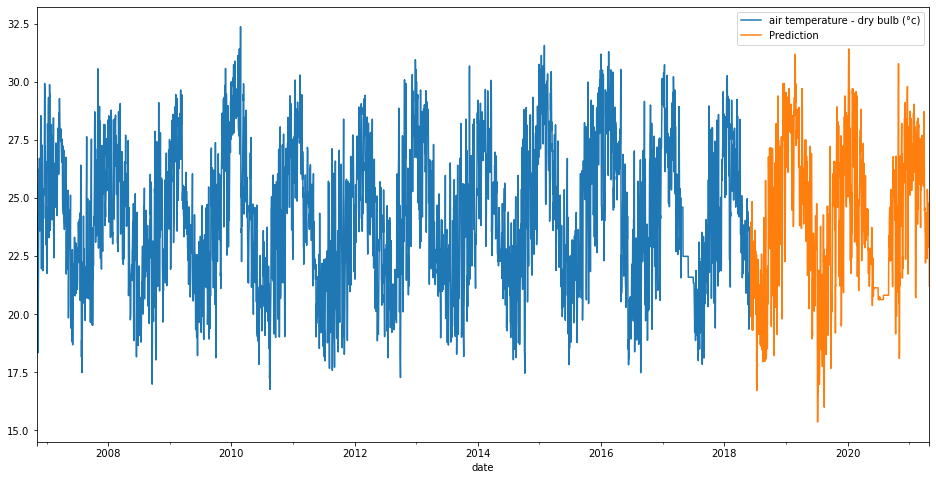

In [251]:
ax = train_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8))
prediction.plot(legend = True)

In [252]:
r2_score(test_df['air temperature - dry bulb (°c)'],prediction)

0.8833644441516816

<AxesSubplot:xlabel='date'>

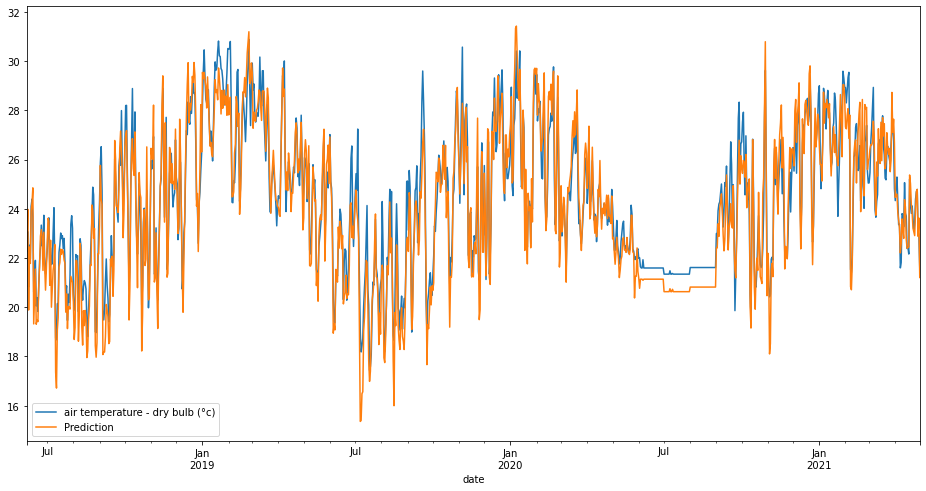

In [253]:
ax = test_df['air temperature - dry bulb (°c)'].plot(legend = True , figsize =(16,8))
prediction.plot(legend = True)

In [254]:
p = res.get_prediction(start=25, dynamic=True)

In [256]:
p.predicted_mean

2006-11-28    28.908655
2006-11-29    27.892470
2006-11-30    25.825303
2006-12-01    25.054099
2006-12-02    22.373035
                ...    
2018-06-02    23.817748
2018-06-03    24.320699
2018-06-04    21.591562
2018-06-05    18.793536
2018-06-06    21.221247
Freq: D, Name: predicted_mean, Length: 4209, dtype: float64